<H1>Big Data Analysis Final Test</H1>
<p>Winter semester 2020/2021<br>
    Date: 22.01.2021
</p>

<H3>Student:</H3>
<p>Adam Grabowski</p>

<h5>1. Create a small sample DataFrame by manually specifying the schema and entering data in Spark. It should contain 5 rows and 3 columns. At least one column should be of type String and one numeric. Column names and entered values are of your choice.</h5>

In [5]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName("Python Spark Session").getOrCreate()

# from pyspark import SparkContext
# sc=SparkContext()
# from pyspark.sql import SQLContext
# sqlc = SQLContext(sc)

# from pyspark.sql import *
# na_schema = Row("Name","Phone number")
# row1 = na_schema("Ania", 5232330)
# row2 = na_schema("Gosia", 5232331)
# row3 = na_schema("Hania", 5232332)
# row4 = na_schema("Monia", 5232333)
# row5 = na_schema("Ela", 5232334)

# na_list = [row1, row2, row3, row4, row5]
# df_na = sqlc.createDataFrame(na_list)

# pyspark.sql.dataframe.DataFrame
# df_na.show()

<h5>2. Create Pandas DataFrame from file: "sample_data.csv" containing data from weather station.<br> 
    a) Find high correlated variables and draw their linear regression model graphs.<br>
    b) Put titles on the charts containing correlation value they illustrate.
</h5>

Maximum Correlation possible for each column:  [0.8  0.8  0.43 0.66 0.16 0.18]
Correlation matrix

                Temperature  Humidity  WindSpeed  SolarRadiation      Rain  \
Temperature        1.000000 -0.802544   0.354068        0.606324 -0.033953   
Humidity          -0.802544  1.000000  -0.426044       -0.656043  0.120843   
WindSpeed          0.354068 -0.426044   1.000000        0.423331  0.112827   
SolarRadiation     0.606324 -0.656043   0.423331        1.000000 -0.090909   
Rain              -0.033953  0.120843   0.112827       -0.090909  1.000000   
Pressure          -0.142875 -0.123636  -0.182511        0.121880 -0.157731   

                Pressure  
Temperature    -0.142875  
Humidity       -0.123636  
WindSpeed      -0.182511  
SolarRadiation  0.121880  
Rain           -0.157731  
Pressure        1.000000   




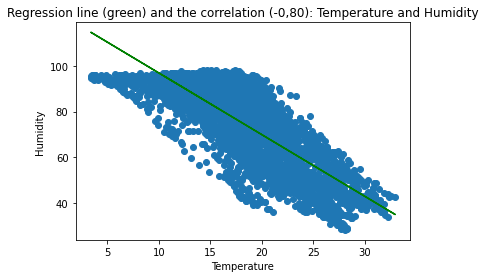

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv("sample_data.csv")

abs_corrmat = np.abs(df.corr())
max_corr = abs_corrmat.apply(lambda x: sorted(x)[-2])
print('Maximum Correlation possible for each column: ', np.round(max_corr.tolist(), 2))

print("Correlation matrix\n")
print(df.corr(method ='pearson'),'\n\n')

X = df.iloc[:,1].values.reshape(-1,1) # 2nd column = Temperature
Y = df.iloc[:,2].values.reshape(-1,1) # 3rd column = Humidity

lr = LinearRegression()
lr.fit(X,Y)

Y_predicted = lr.predict(X)

fig,ax = plt.subplots()
ax.set(title = "Regression line (green) and the correlation (-0,80): Temperature and Humidity",xlabel = "Temperature",ylabel = "Humidity")
ax.scatter(X,Y)
ax.plot(X,Y_predicted, color = 'green')


<h5>3. Use DatFrame created from file: "sample_data.csv". <br>
a) Calculate daily mean temperature (for each day in whole dataset), show the result in tabular form. <br>
    b) Draw bar graph showing daily mean temperature.
</h5>

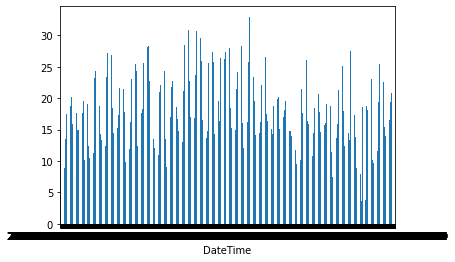

In [3]:
df.groupby('DateTime')['Temperature'].mean().head()

df1 = df.groupby('DateTime')['Temperature'].mean()

ax = df1.plot.bar(x='DateTime', y='Temperature', rot=0)

<h5>4. Using Use DatFrame created from file: "sample_data.csv", find out:<br>
    a) What is the total rainfall in August?<br>
    b) How many rainy days were in August?<br>
    c) How many rainy nights were in August?<br>
    d) Which day did the rain fall the longest (in August)?<br>
</h5>

In [4]:
df.DateTime = pd.to_datetime(df.DateTime)
df.Month = df.DateTime.dt.month_name()

august = df[df.Month == 'August']
august_rain = august['Rain'].sum()
print(august_rain)

# rainy_days = df[('Month' == 'August') & ('Rain' != str(0.0))].value_counts()
# print(rainy_days)
# df.head()

69.6


<ipython-input-4-7fb06e4df161>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Month = df.DateTime.dt.month_name()


<h5>5. Assume, that as part of the study, canopy reflection coefficient (CRC) measurements were performed. The results were recorded every ten days and they are presented in the table below. Associate the data from the table with the data from the weather station (sample_data.csv) so that each record gets the corresponding CRC value depending on the decade. Decades should be set, counting days as follows: first decade: 1st-10th day of month, second: 11th-20th, third: 21st-month end (or data end). Wherever data is missing, the default value CRC = 0.23 should be entered.</h5>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th>Month</th>
      <th>Decade</th>
      <th>CRC</th>
    </tr>
  </thead>
  <tbody>
    <tr>
        <th>7</th>
      <td>1</td>
      <td>1.2</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th>7</th>
      <td>3</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>8</th>
      <td>1</td>
      <td>0.8</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2</td>
      <td>0.6</td>
    </tr>
    <tr>
      <th>8</th>
      <td>3</td>
      <td>0.7</td>
    </tr>

  </tbody>
</table>
You should get the result similar to:<table class="dataframe" border="1">
<thead>
    <tr style="text-align: right;">
        <th></th>
<th>CRC</th>
        <th>DateTime</th>
        <th>Temperature</th>
<th>Humidity</th>
        <th>WindSpeed</th>
        <th>SolarRadiation</th>
<th>Rain</th>
        <th>Pressure</th>
    </tr>
    </thead>
    <tbody>
        <tr>
<th>0</th>
            <td>1.20</td>
            <td>2020-07-07 00:00:00</td>
<td>15.866667</td>
            <td>87.666667</td>
            <td>6.666667</td>
            <td>0</td>
            <td>0.0</td>
<td>1002.400000</td>
        </tr>
        <tr>
            <th>1</th>
            <td>1.20</td>
            <td>2020-07-07 00:30:00</td>
            <td>15.800000</td>
            <td>82.333333</td>
            <td>5.333333</td>
            <td>0</td>
            <td>0.0</td>
            <td>1002.400000</td>
        </tr>
        <tr>
            <th>2</th>
            <td>1.20</td>
<td>2020-07-07 01:00:00</td>
<td>15.066667</td>
<td>82.666667</td>
<td>3.333333</td>
<td>0</td>
<td>0.0</td>
<td>1001.633333</td>
</tr>
<tr>
<th>3</th>
<td>1.20</td>
<td>2020-07-07 01:30:00</td>
<td>15.000000</td>
<td>81.000000</td>
<td>6.000000</td>
<td>0</td>
<td>0.0</td>
<td>1002.133333</td>
</tr>
<tr>
<th>4</th>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
<td>...</td>
</tr>
</tbody>
</table>